In [187]:
# Helper Functions
def identifyColumnsWithNANValues(DataFrame):
    '''
    Returns a list of the names of columns from a Pandas DataFrame with NaN Values
    Parameters:
    column_names: List or Array of the column names from DataFrame
    DataFrame: Pandas DataFrame
    '''
    column_names = np.array(DataFrame.columns)
    naColumns = {}
    for column in column_names:
        if DataFrame[column].isna().sum() != 0:
            naColumns[column] = DataFrame[column].isna().sum()
    return naColumns

## Importing Packages

In [188]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

## Reading in the training data from a CSV into a Pandas DataFrame

In [189]:
df = pd.read_csv("data/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Data Cleaning

## Using the helper function defined above to identify columns with NaN Values

In [190]:
naColumns = identifyColumnsWithNANValues(df)
naColumns

{'Age': 177, 'Cabin': 687, 'Embarked': 2}

## Analysis of the Distribution of the ages of passengers in the training data

(array([24.,  6., 14.,  3.,  7.,  8.,  6.,  3.,  7., 22., 13., 51., 40.,
        27., 46., 24., 36., 47., 27., 35., 17., 34., 29., 11., 27.,  8.,
        18.,  9., 17., 18.,  6., 17.,  6.,  9.,  7.,  2.,  7.,  4.,  7.,
         4.,  3.,  1.,  0.,  2.,  3.,  0.,  1.,  0.,  0.,  1.]),
 array([ 0.42  ,  2.0116,  3.6032,  5.1948,  6.7864,  8.378 ,  9.9696,
        11.5612, 13.1528, 14.7444, 16.336 , 17.9276, 19.5192, 21.1108,
        22.7024, 24.294 , 25.8856, 27.4772, 29.0688, 30.6604, 32.252 ,
        33.8436, 35.4352, 37.0268, 38.6184, 40.21  , 41.8016, 43.3932,
        44.9848, 46.5764, 48.168 , 49.7596, 51.3512, 52.9428, 54.5344,
        56.126 , 57.7176, 59.3092, 60.9008, 62.4924, 64.084 , 65.6756,
        67.2672, 68.8588, 70.4504, 72.042 , 73.6336, 75.2252, 76.8168,
        78.4084, 80.    ]),
 <BarContainer object of 50 artists>)

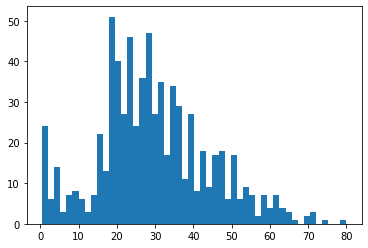

In [191]:
plt.hist(df["Age"], bins = 50)

In [192]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Dealing with NaN/Null Values in the Ages column

In [193]:
print("Number of NaN/Null Values in the Age column is {}".format(naColumns["Age"]))

Number of NaN/Null Values in the Age column is 177


#### Setting the NaN/Null Values to the mean age of the column

In [194]:
setting_nan_values_to_mean_ages = df["Age"].copy()
setting_nan_values_to_mean_ages[setting_nan_values_to_mean_ages.isna()] = setting_nan_values_to_mean_ages.mean()

#### Dropping the NaN/Null Values from the ages

In [195]:
dropping_nan_values_from_ages = df["Age"].copy()
print(dropping_nan_values_from_ages.isna().sum())
dropping_nan_values_from_ages.dropna(inplace = True)
print(dropping_nan_values_from_ages.isna().sum())

177
0


#### Comparing the distribution of the ages from the two cases given above

From the histogram plotted below, it is evident that the better option is to eliminate the data entries corresponding to NaN/Null Values in the Age Column

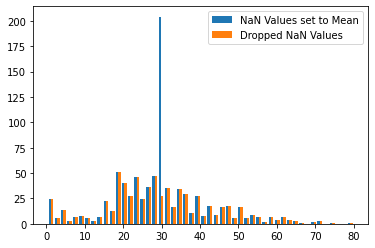

In [196]:
plt.hist([setting_nan_values_to_mean_ages, dropping_nan_values_from_ages], bins = 50, label = ["NaN Values set to Mean", "Dropped NaN Values"])
plt.legend()

In [197]:
df.dropna(subset = ["Age"], inplace = True)
df["Age"].isna().sum()

0

### Dealing with NaN/Null Values in the Cabin Column

In [198]:
print("Number of NaN/Null Values in the Cabin column is {}".format(naColumns["Cabin"]))

Number of NaN/Null Values in the Cabin column is 687


Since the Cabin column has 687 rows of NaN/Null Values and our complete training data has only 715 rows, it will not be useful to include the Cabin column in our analysis

In [199]:
df.drop(columns = "Cabin", inplace = True)

### Dealing with NaN/Null Values in the Embarked Column

In [200]:
df[df["Embarked"].isna() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


Since there are only two rows where the Embarked Column has NaN Values, we can safely these two rows.

In [201]:
df.dropna(subset = ["Embarked"], inplace = True)

#### Distribution of the Embarked Column

(array([554.,   0.,   0.,   0.,   0., 130.,   0.,   0.,   0.,  28.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

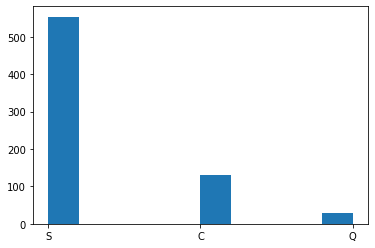

In [202]:
plt.hist(df["Embarked"].values)

In [203]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


## Dealing with Categorical Data

- In our training data, the features "Sex", "Embarked" and "Pclass" are categorical features.
- For the feature "Sex", we split it into one-hot encoded features "sex_male" and "sex_female" and combine one of these into our training data

In [204]:
sex_male = pd.get_dummies(df["Sex"])["male"]
df["sex_male"] = sex_male
df.drop(columns = "Sex", inplace = True)

In [210]:
Pclass_one_hot = pd.get_dummies(df["Pclass"])
Pclass_one_hot.rename(columns = {1: "Pclass_1", 2: "Pclass_2", 3: "Pclass_3"}, inplace = True)
df["Pclass_1"] = Pclass_one_hot["Pclass_1"]
df["Pclass_2"] = Pclass_one_hot["Pclass_2"]
df["Pclass_3"] = Pclass_one_hot["Pclass_3"]
df.drop(columns = "Pclass", inplace = True)

In [211]:
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,Q,0,0,0,1
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,S,1,0,1,0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,S,0,1,0,0
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C,1,1,0,0
